In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
os.chdir('F:/Testing_ML/Titanic')

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train_test_dataset = [train,test]

In [6]:
for dataset in train_test_dataset:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')

In [7]:
print(train.Title.value_counts())
print('************************')
test.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Lady          1
Don           1
Capt          1
Ms            1
Countess      1
Jonkheer      1
Mme           1
Name: Title, dtype: int64
************************


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [8]:
title_map = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Major':3,'Col':3,'Mlle':3,'Don':3,'Lady':3,'Mme':3,'Sir':3,
            'Countess':3,'Johnkheer':3,'Ms':3,'Capt':3,'Dona':3}

In [9]:
for dataset in train_test_dataset:
    dataset['Title'] = dataset['Title'].map(title_map)

In [10]:
for dataset in train_test_dataset:
    dataset.drop('Name',axis=1,inplace=True)

In [11]:
train.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S    0.0  
1          PC 17599  71.2833   C85        C    2.0  
2  STON/O2. 3101282   7.9250   NaN        S    1.0  
3            113803  53.1000  C123        S    2.0  
4            373450   8.0500   NaN        S    0.0

In [12]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
embarked_map = {'S':0,'C':1,'Q':2}
for dataset in train_test_dataset:
    dataset['Embarked'] =dataset['Embarked'].map(embarked_map)

In [14]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True)

In [15]:
bar_chart('Sex')

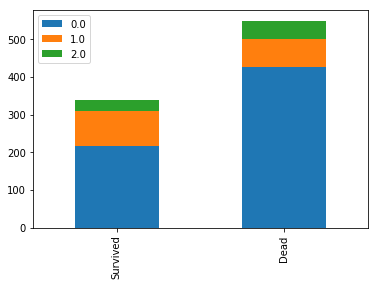

In [16]:
bar_chart('Embarked')

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [18]:
for dataset in train_test_dataset:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),inplace=True)

In [19]:
for dataset in train_test_dataset:
    dataset.loc[dataset['Age'] < 16,'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26) ,'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 40) ,'Age'] = 2,
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60) ,'Age'] = 3,
    dataset.loc[dataset['Age'] > 60,'Age'] = 4

In [20]:
train.head()

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    male  1.0      1      0         A/5 21171   
1            2         1       1  female  2.0      1      0          PC 17599   
2            3         1       3  female  1.0      0      0  STON/O2. 3101282   
3            4         1       1  female  2.0      1      0            113803   
4            5         0       3    male  2.0      0      0            373450   

      Fare Cabin  Embarked  Title  
0   7.2500   NaN       0.0    0.0  
1  71.2833   C85       1.0    2.0  
2   7.9250   NaN       0.0    1.0  
3  53.1000  C123       0.0    2.0  
4   8.0500   NaN       0.0    0.0

In [21]:
sex_map = {'male':0,'female':1}
for dataset in train_test_dataset:
    dataset['Sex'] = dataset['Sex'].map(sex_map)

In [22]:
test['Fare'].fillna(test.groupby('Title')['Fare'].transform('median'),inplace=True)

In [23]:
for dataset in train_test_dataset:
    dataset.loc[dataset['Fare'] < 50,'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100) ,'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 500) ,'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 500 ,'Fare'] = 3

In [24]:
for dataset in train_test_dataset:
    dataset.drop('Ticket',axis=1,inplace=True)

In [25]:
for dataset in train_test_dataset:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1

In [26]:
for dataset in train_test_dataset:
    dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin          687
Embarked         2
Title            1
Family_Size      0
dtype: int64

In [28]:
for dataset in train_test_dataset:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [29]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [30]:
test.Cabin.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [31]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8}
for dataset in train_test_dataset:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [32]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  \
0            1         0       3    0  1.0   0.0    NaN       0.0    0.0   
1            2         1       1    1  2.0   1.0    0.8       1.0    2.0   
2            3         1       3    1  1.0   0.0    NaN       0.0    1.0   
3            4         1       1    1  2.0   1.0    0.8       0.0    2.0   
4            5         0       3    0  2.0   0.0    NaN       0.0    0.0   

   Family_Size  
0            2  
1            2  
2            1  
3            2  
4            1

In [33]:
for dataset in train_test_dataset:
    dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [34]:
for dataset in train_test_dataset:
    dataset['Embarked'].fillna(dataset.groupby('Pclass')['Embarked'].transform('median'),inplace=True)

In [35]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          1
Family_Size    0
dtype: int64

In [36]:
for dataset in train_test_dataset:
    dataset['Title'].fillna(dataset.groupby('Pclass')['Title'].transform('median'),inplace=True)

In [74]:
train.head()

PassengerId  Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  Title  \
0            1         0       3    0  1.0   0.0    2.0       0.0    0.0   
1            2         1       1    1  2.0   1.0    0.8       1.0    2.0   
2            3         1       3    1  1.0   0.0    2.0       0.0    1.0   
3            4         1       1    1  2.0   1.0    0.8       0.0    2.0   
4            5         0       3    0  2.0   0.0    2.0       0.0    0.0   

   Family_Size  
0            2  
1            2  
2            1  
3            2  
4            1